In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Read source dataset.

In [23]:
os.chdir('C:/Users/onkar/Desktop/My_Folders/python files')

In [24]:
df_state=pd.read_csv('StatewiseTestingDetails.csv')
df_covid=pd.read_csv('covid_19_india.csv')
df_vacc=pd.read_csv('covid_vaccine_statewise.csv')

In [25]:
df_state.info(),df_covid.info(),df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  obje

(None, None, None)

In [26]:
df_state.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [27]:
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [28]:
df_vacc.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


## 2. Data Cleaning and removing duplicate state/UT.

In [29]:
df_state['State'].unique(),df_state['State'].nunique()

(array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 36)

In [30]:
df_covid['State/UnionTerritory'].unique(),df_covid['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [31]:
df_vacc['State'].unique(),df_vacc['State'].nunique()

(array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 37)

In [32]:
dict(zip(df_vacc['State'].unique(),df_vacc['State'].unique()))

{'India': 'India',
 'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
 'Andhra Pradesh': 'Andhra Pradesh',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Assam': 'Assam',
 'Bihar': 'Bihar',
 'Chandigarh': 'Chandigarh',
 'Chhattisgarh': 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi': 'Delhi',
 'Goa': 'Goa',
 'Gujarat': 'Gujarat',
 'Haryana': 'Haryana',
 'Himachal Pradesh': 'Himachal Pradesh',
 'Jammu and Kashmir': 'Jammu and Kashmir',
 'Jharkhand': 'Jharkhand',
 'Karnataka': 'Karnataka',
 'Kerala': 'Kerala',
 'Ladakh': 'Ladakh',
 'Lakshadweep': 'Lakshadweep',
 'Madhya Pradesh': 'Madhya Pradesh',
 'Maharashtra': 'Maharashtra',
 'Manipur': 'Manipur',
 'Meghalaya': 'Meghalaya',
 'Mizoram': 'Mizoram',
 'Nagaland': 'Nagaland',
 'Odisha': 'Odisha',
 'Puducherry': 'Puducherry',
 'Punjab': 'Punjab',
 'Rajasthan': 'Rajasthan',
 'Sikkim': 'Sikkim',
 'Tamil Nadu': 'Tamil Nadu',
 'Telangana': 'Telangana',
 'Tripura': 'Trip

In [33]:
dict(zip(df_covid['State/UnionTerritory'].unique(),df_covid['State/UnionTerritory'].unique()))

{'Kerala': 'Kerala',
 'Telengana': 'Telengana',
 'Delhi': 'Delhi',
 'Rajasthan': 'Rajasthan',
 'Uttar Pradesh': 'Uttar Pradesh',
 'Haryana': 'Haryana',
 'Ladakh': 'Ladakh',
 'Tamil Nadu': 'Tamil Nadu',
 'Karnataka': 'Karnataka',
 'Maharashtra': 'Maharashtra',
 'Punjab': 'Punjab',
 'Jammu and Kashmir': 'Jammu and Kashmir',
 'Andhra Pradesh': 'Andhra Pradesh',
 'Uttarakhand': 'Uttarakhand',
 'Odisha': 'Odisha',
 'Puducherry': 'Puducherry',
 'West Bengal': 'West Bengal',
 'Chhattisgarh': 'Chhattisgarh',
 'Chandigarh': 'Chandigarh',
 'Gujarat': 'Gujarat',
 'Himachal Pradesh': 'Himachal Pradesh',
 'Madhya Pradesh': 'Madhya Pradesh',
 'Bihar': 'Bihar',
 'Manipur': 'Manipur',
 'Mizoram': 'Mizoram',
 'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
 'Goa': 'Goa',
 'Unassigned': 'Unassigned',
 'Assam': 'Assam',
 'Jharkhand': 'Jharkhand',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Tripura': 'Tripura',
 'Nagaland': 'Nagaland',
 'Meghalaya': 'Meghalaya',
 'Dadra and Nagar Haveli and

In [34]:
state_correction_dict={
    'Bihar****':'Bihar',
    'Dadra and Nagar Haveli':'Dadra and Nagar Haveli and Daman and Diu',
    'Maharashtra***':'Maharashtra',
    'Madhya Pradesh***':'Madhya Pradesh',
    'Karanataka':'Karnataka',
    'Himanchal Pradesh':'Himachal Pradesh',
    'Telangana':'Telengana',
}

In [35]:
def state_correction(state):
    try:
        return state_correction_dict[state]
    except:
        return state

In [36]:
df_covid['State/UnionTerritory']=df_covid['State/UnionTerritory'].apply(state_correction)

In [40]:
df_covid['State/UnionTerritory'].unique(),df_covid['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep'], dtype=object),
 39)

In [46]:
df_vacc['Updated On']=pd.to_datetime(df_vacc['Updated On'])
df_state['Date']=pd.to_datetime(df_state['Date'])
df_covid['Date']=pd.to_datetime(df_covid['Date'])

In [51]:
df_state.columns,df_state.shape

(Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object'),
 (16336, 5))

In [52]:
df_vacc.columns,df_vacc.shape

(Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
        ' Sites ', 'First Dose Administered', 'Second Dose Administered',
        'Male (Doses Administered)', 'Female (Doses Administered)',
        'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
        'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
        'AEFI', '18-44 Years (Doses Administered)',
        '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
        '18-44 Years(Individuals Vaccinated)',
        '45-60 Years(Individuals Vaccinated)',
        '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
        'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
        'Total Individuals Vaccinated'],
       dtype='object'),
 (7845, 24))

In [53]:
df_covid.columns,df_covid.shape

(Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
        'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
        'Deaths', 'Confirmed'],
       dtype='object'),
 (18110, 9))

In [64]:
df=df_covid.merge(df_state,left_on=['State/UnionTerritory','Date'],right_on=['State','Date'],how='left')

In [65]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,NaN,NaN,NaN,NaN
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18111 entries, 0 to 18110
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18111 non-null  int64         
 1   Date                      18111 non-null  datetime64[ns]
 2   Time                      18111 non-null  object        
 3   State/UnionTerritory      18111 non-null  object        
 4   ConfirmedIndianNational   18111 non-null  object        
 5   ConfirmedForeignNational  18111 non-null  object        
 6   Cured                     18111 non-null  int64         
 7   Deaths                    18111 non-null  int64         
 8   Confirmed                 18111 non-null  int64         
 9   State                     15844 non-null  object        
 10  TotalSamples              15844 non-null  float64       
 11  Negative                  6866 non-null   object        
 12  Positive          

In [68]:
df_state.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [74]:
df.drop(['Time','Sno','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

KeyError: "['Time', 'Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational'] not found in axis"

In [76]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive
0,2020-01-30,Kerala,0,0,1,NaN,NaN,NaN,NaN
1,2020-01-31,Kerala,0,0,1,NaN,NaN,NaN,NaN
2,2020-02-01,Kerala,0,0,2,NaN,NaN,NaN,NaN
3,2020-02-02,Kerala,0,0,3,NaN,NaN,NaN,NaN
4,2020-02-03,Kerala,0,0,3,NaN,NaN,NaN,NaN


In [77]:
df['ActiveCases']=df['Confirmed']-df['Deaths']+df['Cured']

In [80]:
df['ActiveCases']

0              1
1              1
2              2
3              3
4              3
          ...   
18106    1284932
18107     157698
18108     669744
18109    3371529
18110    3023279
Name: ActiveCases, Length: 18111, dtype: int64

In [81]:
df.isna().sum()

Date                        0
State/UnionTerritory        0
Cured                       0
Deaths                      0
Confirmed                   0
State                    2267
TotalSamples             2267
Negative                11245
Positive                12596
ActiveCases                 0
dtype: int64

In [82]:
df.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed', 'State',
       'TotalSamples', 'Negative', 'Positive', 'ActiveCases'],
      dtype='object')

In [ ]:
df=df['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed', 'ActiveCases', 'State','TotalSamples']

In [85]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,State,TotalSamples
0,2020-01-30,Kerala,0,0,1,1,NaN,NaN
1,2020-01-31,Kerala,0,0,1,1,NaN,NaN
2,2020-02-01,Kerala,0,0,2,2,NaN,NaN
3,2020-02-02,Kerala,0,0,3,3,NaN,NaN
4,2020-02-03,Kerala,0,0,3,3,NaN,NaN
...,...,...,...,...,...,...,...,...
18106,2021-08-11,Telengana,638410,3831,650353,1284932,NaN,NaN
18107,2021-08-11,Tripura,77811,773,80660,157698,NaN,NaN
18108,2021-08-11,Uttarakhand,334650,7368,342462,669744,NaN,NaN
18109,2021-08-11,Uttar Pradesh,1685492,22775,1708812,3371529,NaN,NaN


In [87]:
df1=df.sort_values(['State/UnionTerritory','Date'],ignore_index=True)

In [88]:
df1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,State,TotalSamples
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,NaN,NaN
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN
...,...,...,...,...,...,...,...,...
18106,2021-08-07,West Bengal,1503535,18202,1532379,3017712,West Bengal,16045662.0
18107,2021-08-08,West Bengal,1504326,18217,1533128,3019237,West Bengal,16092192.0
18108,2021-08-09,West Bengal,1505089,18229,1533803,3020663,West Bengal,16122345.0
18109,2021-08-10,West Bengal,1505808,18240,1534360,3021928,West Bengal,16162814.0


In [89]:
df1["Cured_dsh"]=df1["Cured"].shift(periods=1,fill_value=0)
df1["Deaths_dsh"]=df1["Deaths"].shift(periods=1,fill_value=0)
df1["Confirmed_dsh"]=df1["Confirmed"].shift(periods=1,fill_value=0)
df1["Active_dsh"]=df1["ActiveCases"].shift(periods=1,fill_value=0)

In [90]:
df1["CuredDaily"]=df1["Cured"]-df1["Cured_dsh"]
df1["DeathsDaily"]=df1["Deaths"]-df1["Deaths_dsh"]
df1["ConfirmedDaily"]=df1["Confirmed"]-df1["Confirmed_dsh"]

In [91]:
df1["ActiveDaily"]=df1['ConfirmedDaily'] - (df1['CuredDaily'] + df1['DeathsDaily'])

In [92]:
def negtozero(x):
    if x<0:
        return 0
    else:
        return x

In [93]:
df1["CuredDaily"]=df1["CuredDaily"].apply(negtozero)
df1["DeathsDaily"]=df1["DeathsDaily"].apply(negtozero)
df1["ConfirmedDaily"]=df1["ConfirmedDaily"].apply(negtozero)
df1["ActiveDaily"]=df1["ActiveDaily"].apply(negtozero)

In [94]:
df1.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'ActiveCases', 'State', 'TotalSamples', 'Cured_dsh', 'Deaths_dsh',
       'Confirmed_dsh', 'Active_dsh', 'CuredDaily', 'DeathsDaily',
       'ConfirmedDaily', 'ActiveDaily'],
      dtype='object')

In [95]:
df1=df1[['Date','State/UnionTerritory','Cured','Deaths','Confirmed','ActiveCases','CuredDaily','DeathsDaily','ConfirmedDaily','ActiveDaily']]

In [96]:
df1.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,CuredDaily,DeathsDaily,ConfirmedDaily,ActiveDaily
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,0,0,1,1
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,0,0,0,0
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,0,0,5,5
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,0,0,3,3
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,0,0,0,0


In [97]:
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year
df1['Qtr']=df1['Date'].dt.quarter

C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\1726062643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day']=df1['Date'].dt.day
C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\1726062643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1['Date'].dt.month
C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\1726062643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [98]:
# to convert day and month one digit to two digit for proper sorting
def twodigit(x):
    if x<10:
        return "0"+str(x)
    else:
        return str(x)

In [99]:
df1['Day']=df1['Day'].apply(twodigit)
df1['Month']=df1['Month'].apply(twodigit)
df1['Year']=df1['Year'].apply(twodigit)
df1['Qtr']=df1['Qtr'].apply(twodigit)

C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\1699944871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day']=df1['Day'].apply(twodigit)
C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\1699944871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1['Month'].apply(twodigit)
C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\1699944871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [100]:
df1['YYMM']=df1['Year']+"-"+df1['Month']
df1['YYQQ']=df1['Year']+"-"+df1['Qtr']

C:\Users\onkar\AppData\Local\Temp\ipykernel_18504\3878298922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YYMM']=df1['Year']+"-"+df1['Month']


In [101]:
dfstate=df1.groupby(['State/UnionTerritory'])[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

In [102]:
dfstateconfirmed=dfstate.sort_values(["Confirmed"],ascending=False,ignore_index=True)
dfstateconfirmed=dfstateconfirmed.iloc[0:10]

Text(0.5, 1.0, 'State with Maximum Confirmed Cases')

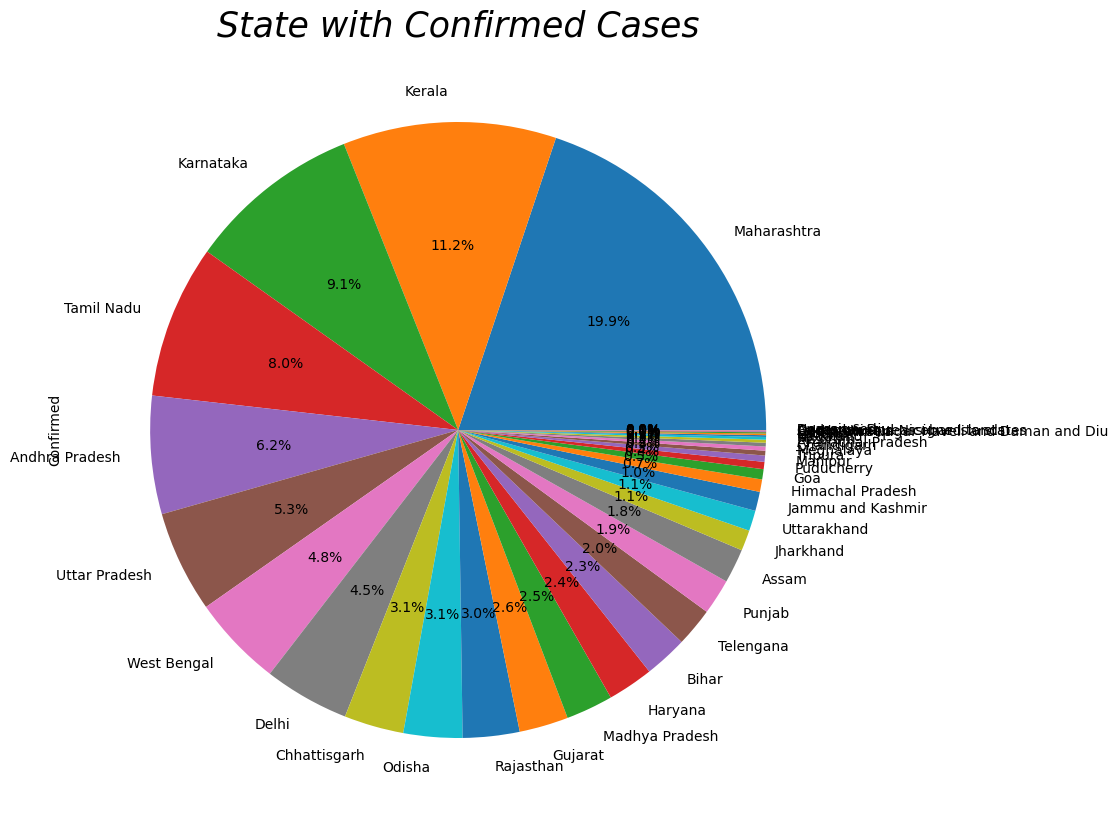

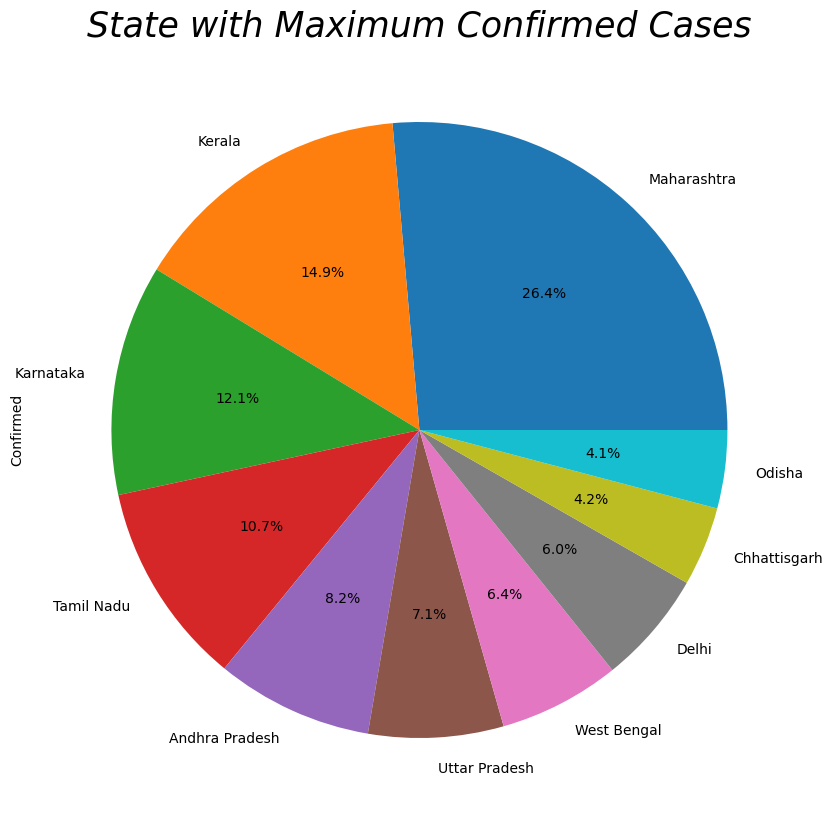

In [103]:
plt.figure(figsize=(20,15))

dfstate1=dfstate.sort_values(["Confirmed"],ascending=False)
dfstate1["Confirmed"].plot(kind="pie",labels=dfstate1['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Confirmed Cases",fontsize=25,fontstyle="oblique")

plt.figure(figsize=(20,15))

dfstateconfirmed.sort_values(["Confirmed"],ascending=False)
dfstateconfirmed["Confirmed"].plot(kind="pie",labels=dfstateconfirmed['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Maximum Confirmed Cases",fontsize=25,fontstyle="oblique")

In [104]:
dfstatecured=dfstate.sort_values(["Cured"],ascending=False,ignore_index=True)
dfstatecured=dfstatecured.iloc[0:10]

Text(0.5, 1.0, 'State with Maximum Cured Cases')

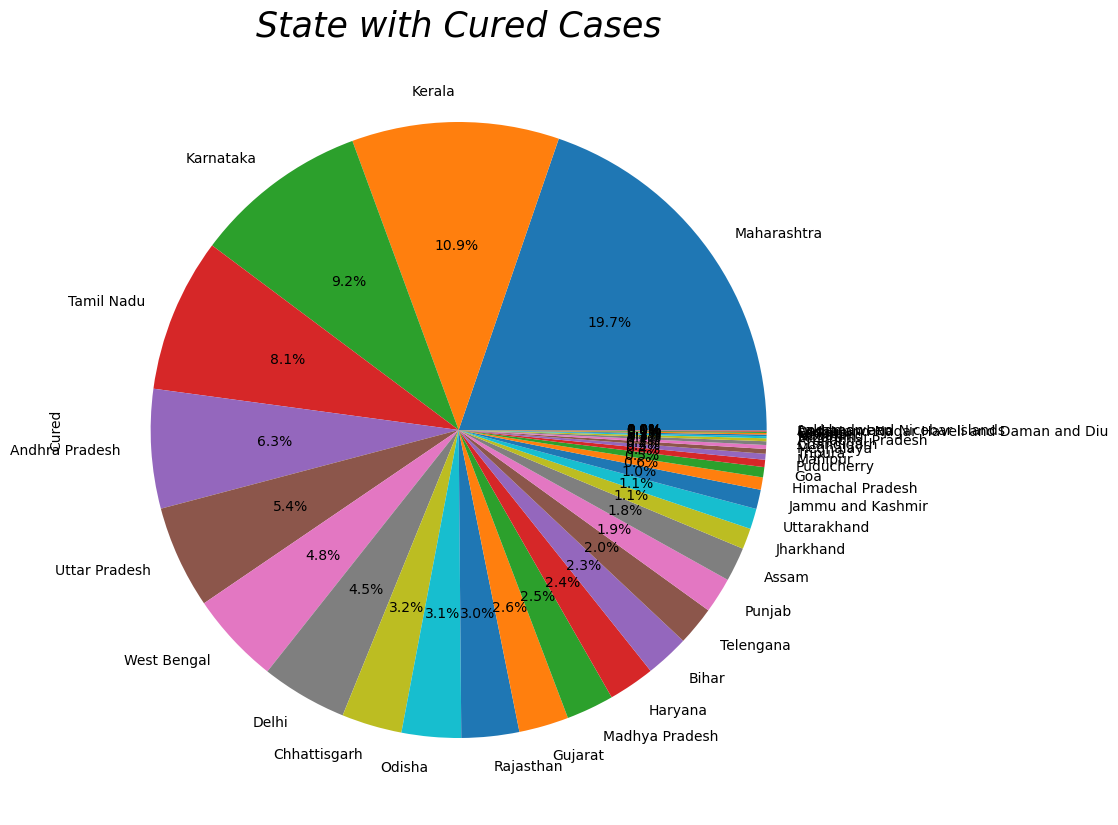

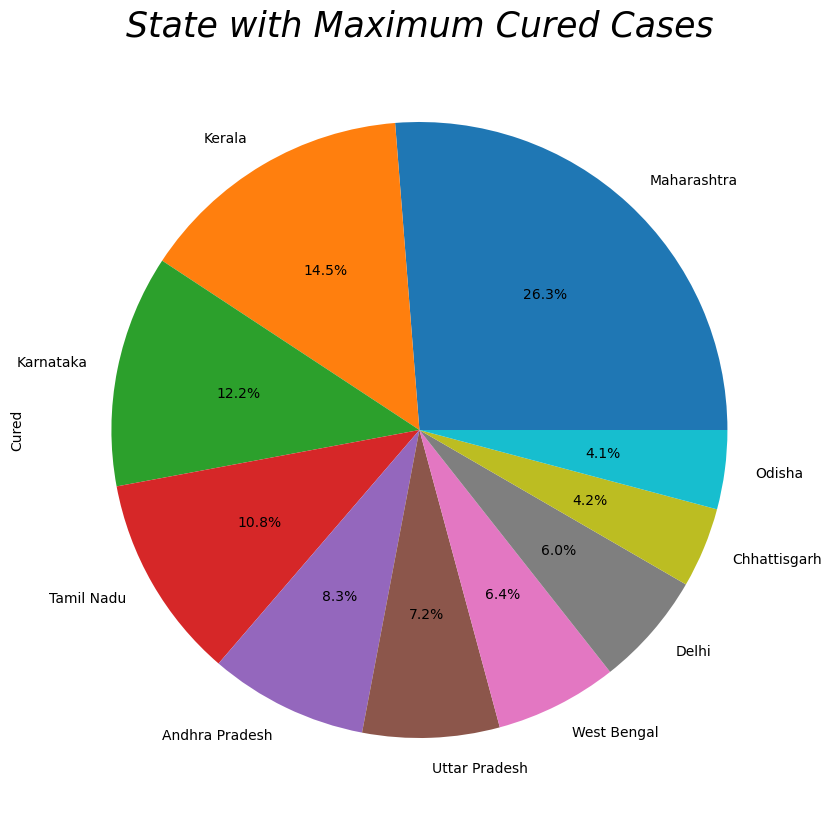

In [105]:
plt.figure(figsize=(20,15))

dfstate1=dfstate.sort_values(["Cured"],ascending=False)
dfstate1["Cured"].plot(kind="pie",labels=dfstate1['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Cured Cases",fontsize=25,fontstyle="oblique")

plt.figure(figsize=(20,15))

dfstatecured.sort_values(["Cured"],ascending=False)
dfstatecured["Cured"].plot(kind="pie",labels=dfstatecured['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Maximum Cured Cases",fontsize=25,fontstyle="oblique")

In [107]:
dfstatedeaths=dfstate.sort_values(["Deaths"],ascending=False,ignore_index=True)
dfstatedeaths=dfstatedeaths.iloc[0:10]

Text(0.5, 1.0, 'State with Maximum Deaths Cases')

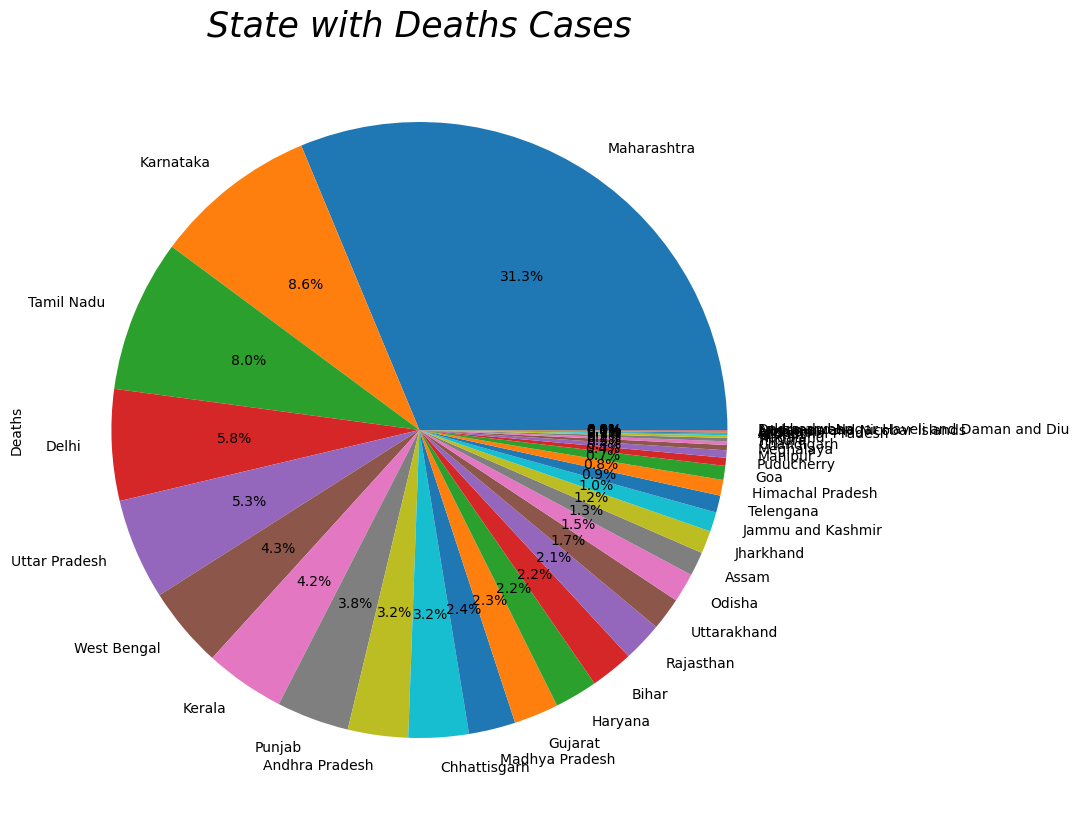

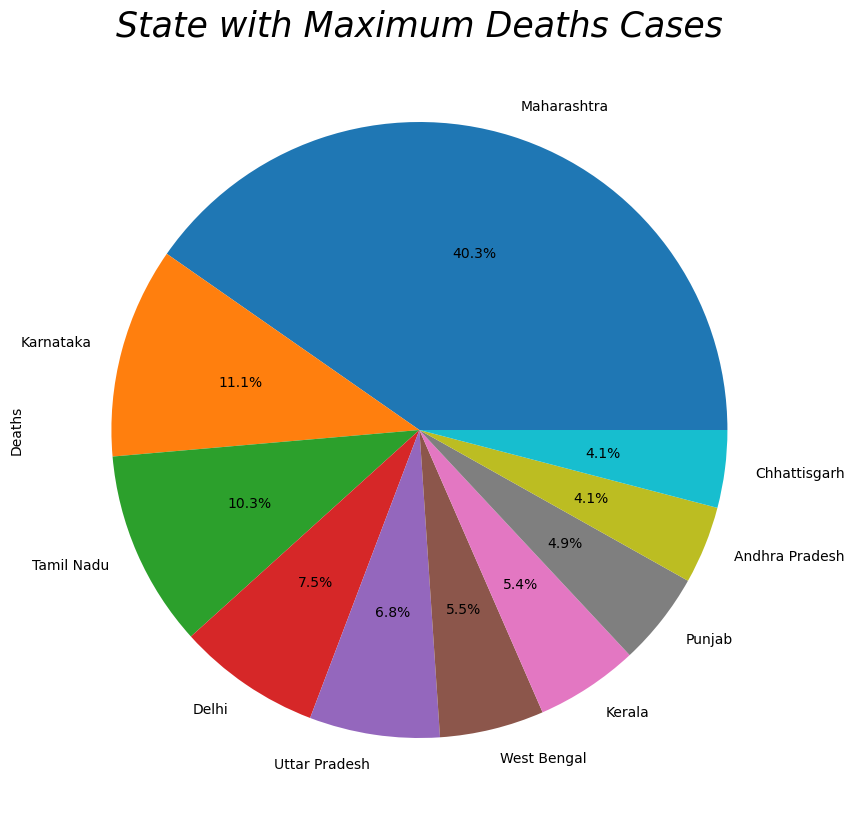

In [108]:
plt.figure(figsize=(20,15))

dfstate1=dfstate.sort_values(["Deaths"],ascending=False)
dfstate1["Deaths"].plot(kind="pie",labels=dfstate1['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Deaths Cases",fontsize=25,fontstyle="oblique")

plt.figure(figsize=(20,15))

dfstatedeaths.sort_values(["Deaths"],ascending=False)
dfstatedeaths["Deaths"].plot(kind="pie",labels=dfstatedeaths['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Maximum Deaths Cases",fontsize=25,fontstyle="oblique")

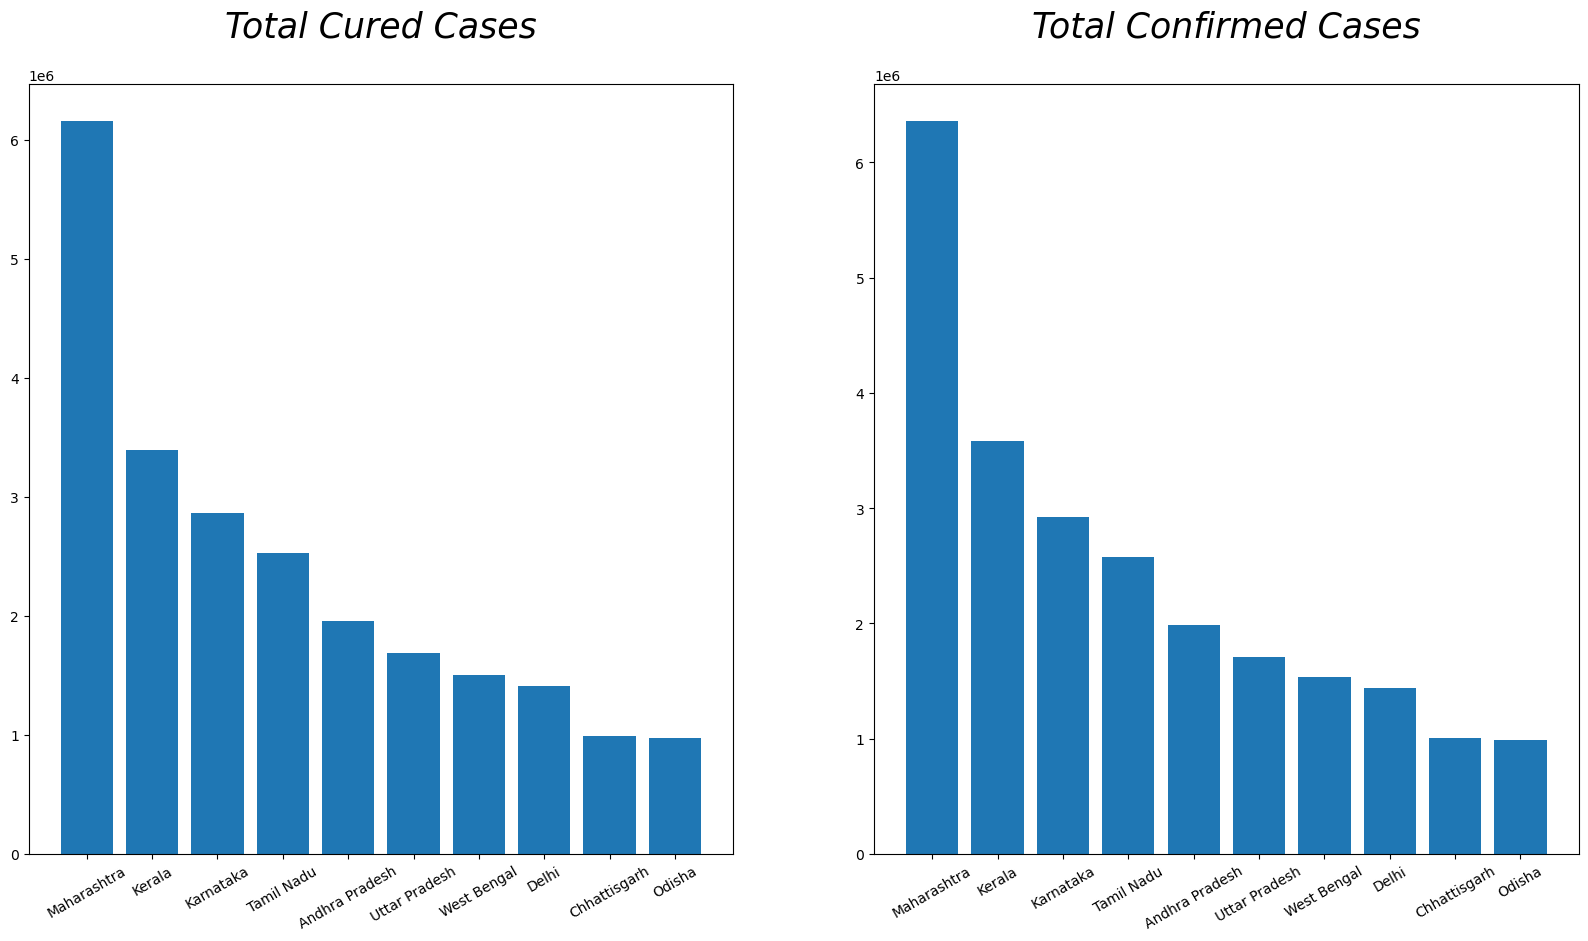

In [109]:
dfstatecured.set_index(dfstatecured['State/UnionTerritory'])

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.bar(dfstatecured['State/UnionTerritory'], dfstatecured["Cured"],align='center')
plt.xticks(dfstatecured['State/UnionTerritory'],rotation="30")
plt.title("Total Cured Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(1,2,2)
plt.bar(dfstatecured['State/UnionTerritory'], dfstatecured["Confirmed"],align='center')
plt.xticks(dfstatecured['State/UnionTerritory'],rotation="30")
plt.title("Total Confirmed Cases\n",fontsize=25,fontstyle="oblique")
plt.show()

In [110]:
dfmonthwise=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfmonthwise=dfmonthwise.groupby(['YYMM'])[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

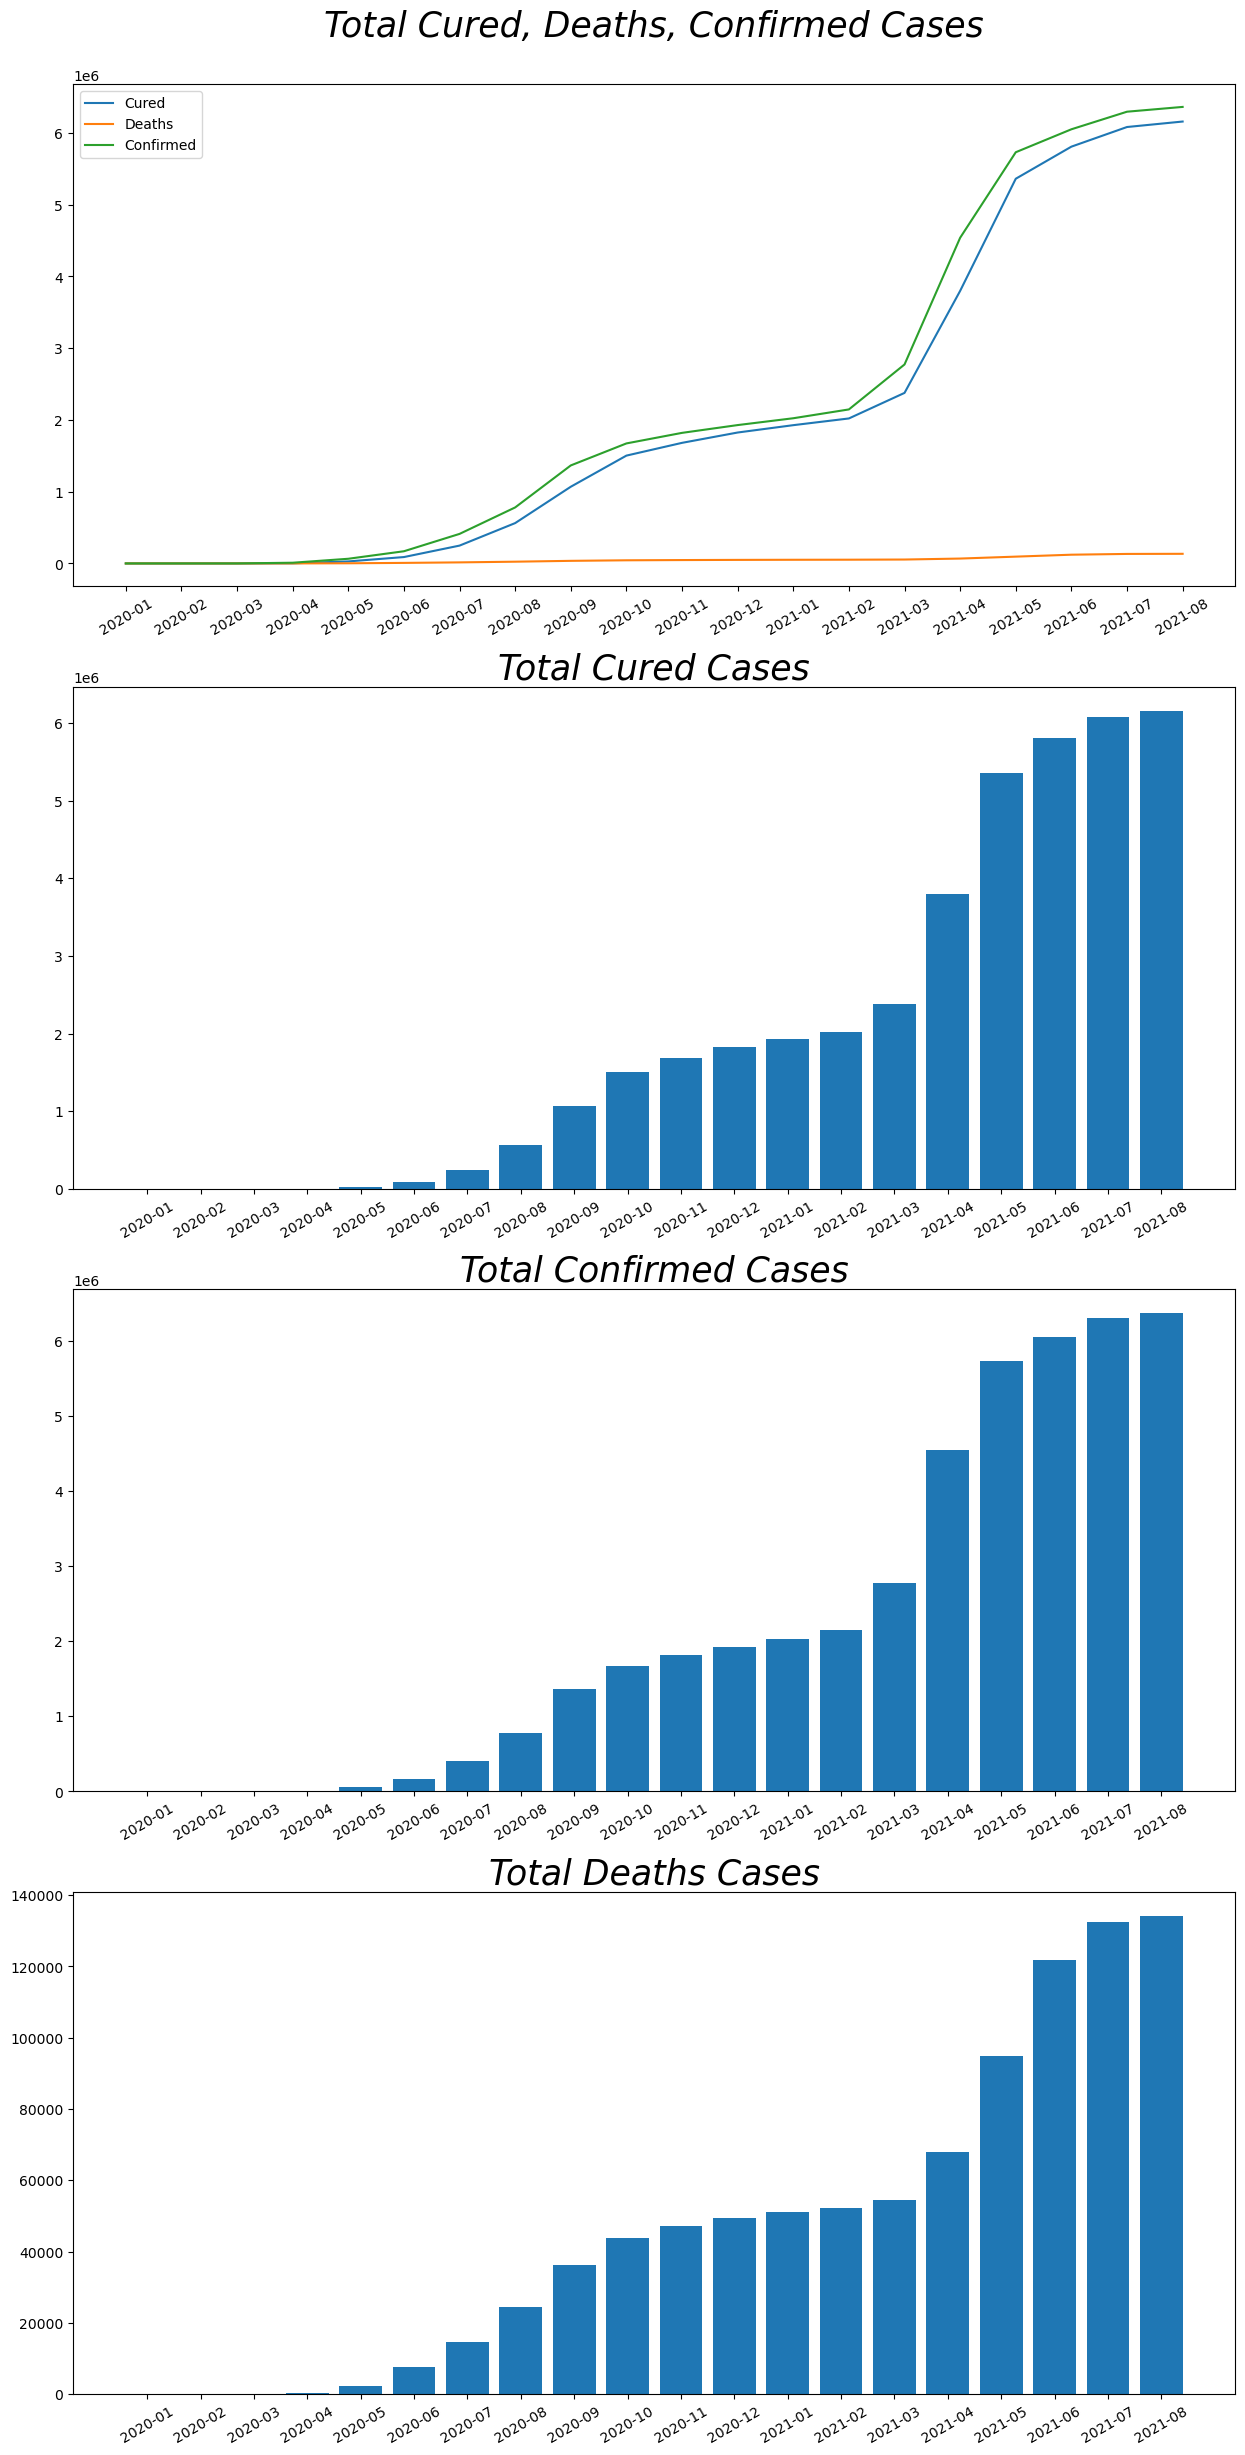

In [111]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfmonthwise["YYMM"],dfmonthwise[['Cured','Deaths','Confirmed']])
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.legend(['Cured','Deaths','Confirmed'])
plt.title("Total Cured, Deaths, Confirmed Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfmonthwise['YYMM'], dfmonthwise["Cured"],align='center')
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.title("Total Cured Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfmonthwise['YYMM'], dfmonthwise["Confirmed"],align='center')
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.title("Total Confirmed Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfmonthwise['YYMM'], dfmonthwise["Deaths"],align='center')
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.title("Total Deaths Cases",fontsize=25,fontstyle="oblique")
plt.show()

In [112]:
dfqtrwise=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfqtrwise=dfqtrwise.groupby(['YYQQ'])[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

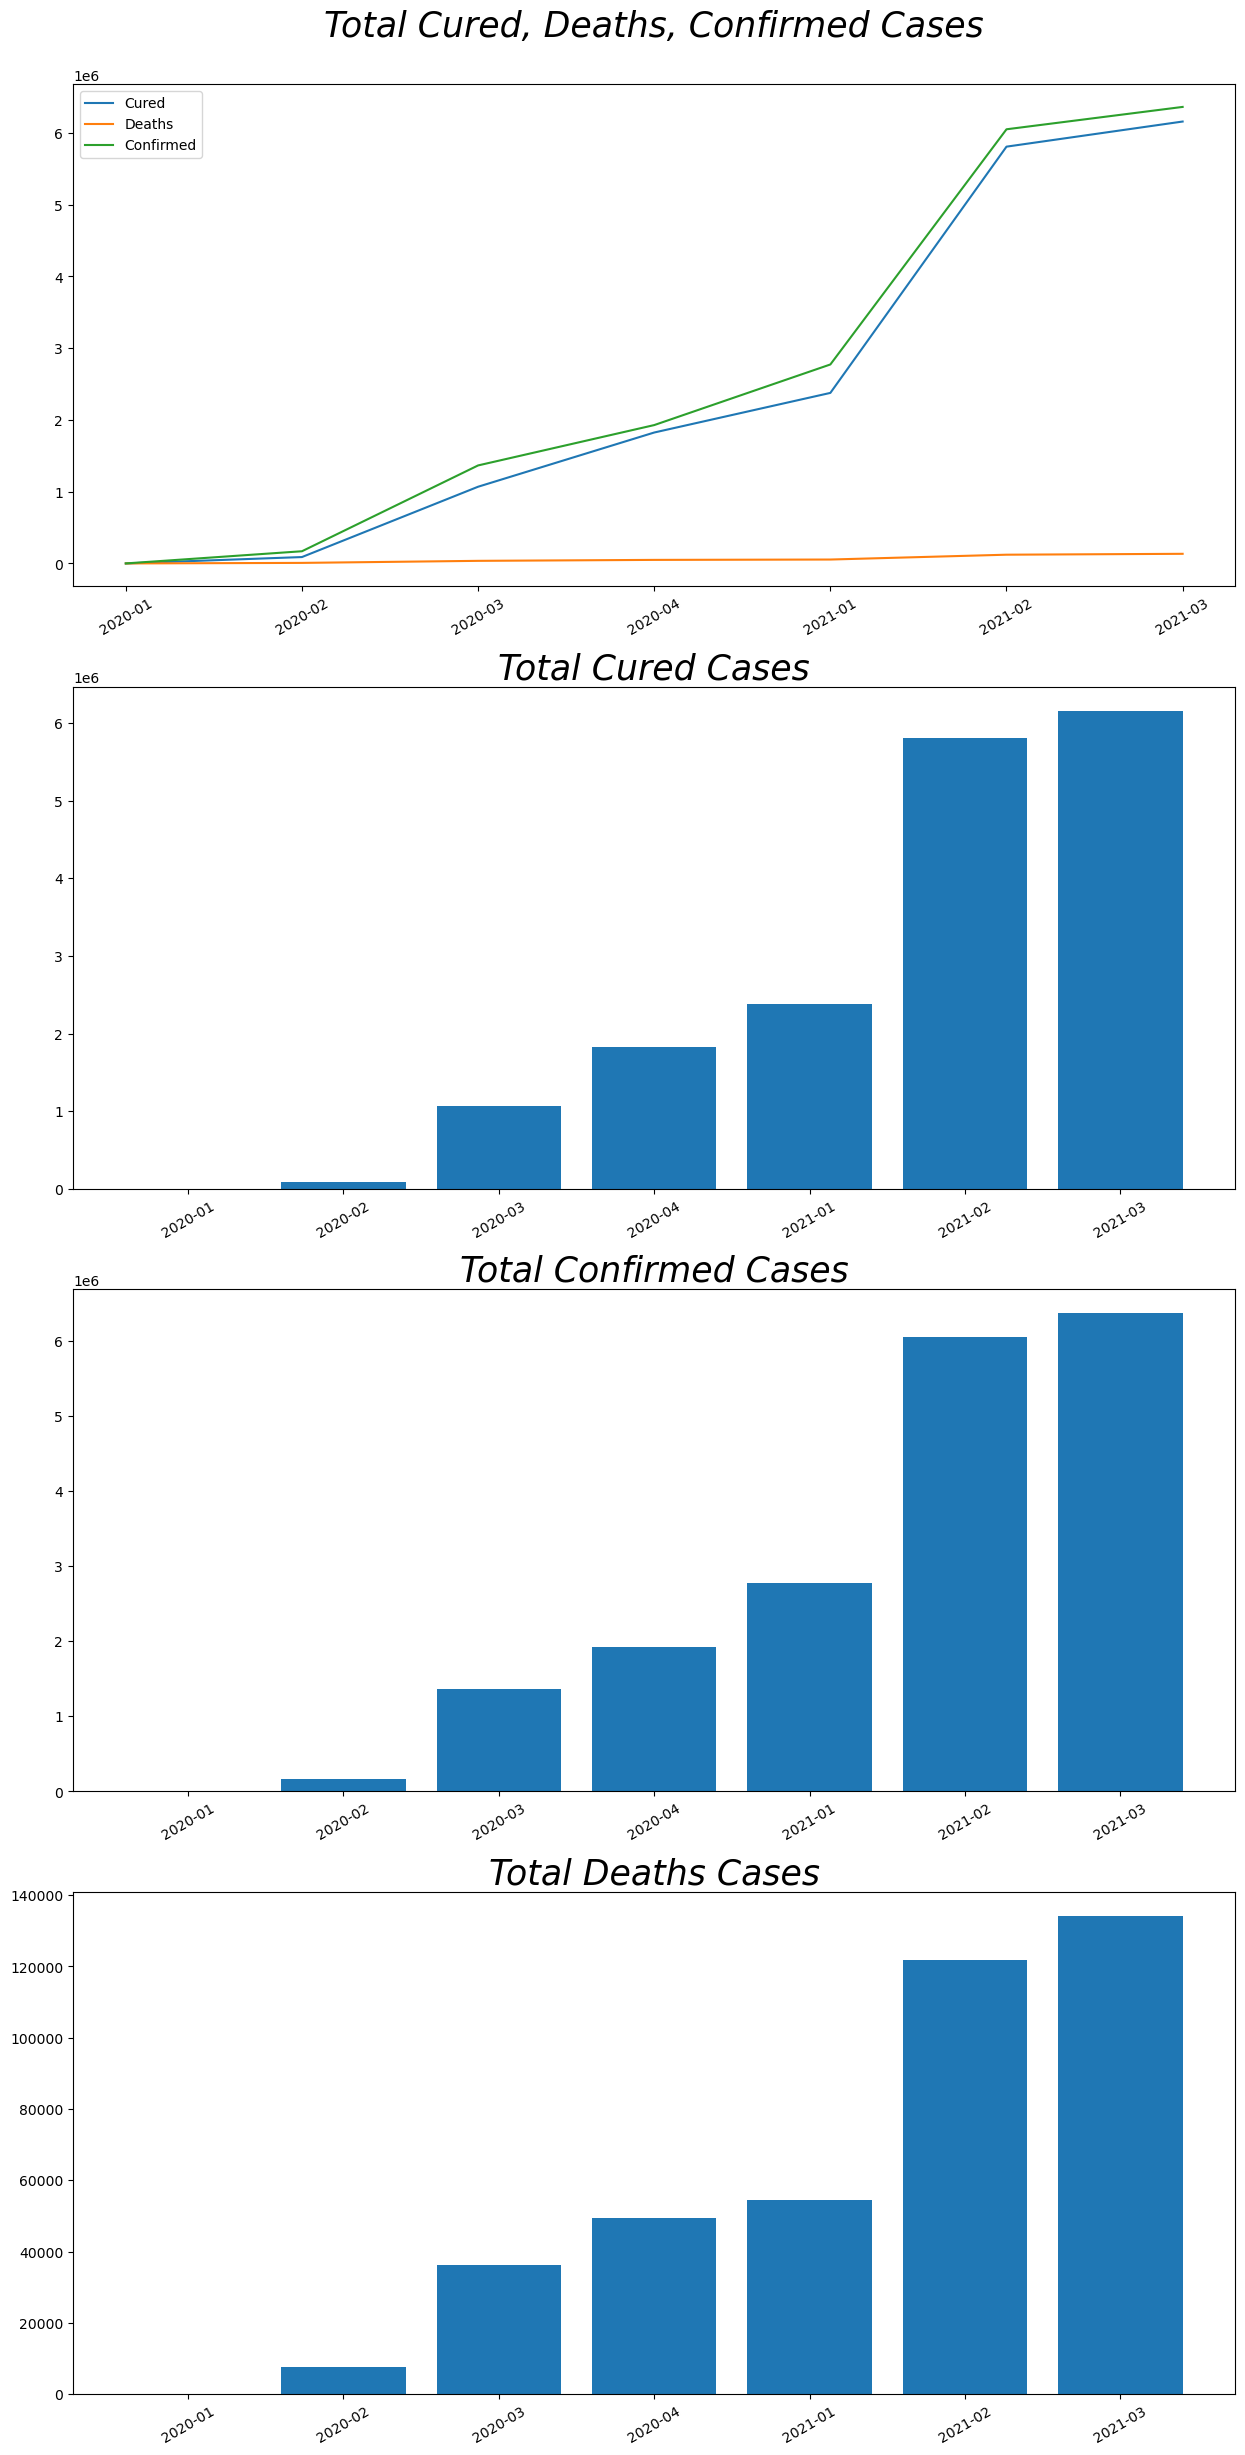

In [113]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfqtrwise["YYQQ"],dfqtrwise[['Cured','Deaths','Confirmed']])
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.legend(['Cured','Deaths','Confirmed'])
plt.title("Total Cured, Deaths, Confirmed Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfqtrwise['YYQQ'], dfqtrwise["Cured"],align='center')
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.title("Total Cured Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfqtrwise['YYQQ'], dfqtrwise["Confirmed"],align='center')
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.title("Total Confirmed Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfqtrwise['YYQQ'], dfqtrwise["Deaths"],align='center')
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.title("Total Deaths Cases",fontsize=25,fontstyle="oblique")
plt.show()

In [114]:
df1.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'ActiveCases', 'CuredDaily', 'DeathsDaily', 'ConfirmedDaily',
       'ActiveDaily', 'Day', 'Month', 'Year', 'Qtr', 'YYMM', 'YYQQ'],
      dtype='object')

In [115]:
dfstatedaily=df1.groupby(['State/UnionTerritory'])[['CuredDaily', 'DeathsDaily', 'ConfirmedDaily']].mean().reset_index()
dfstatedaily.columns

Index(['State/UnionTerritory', 'CuredDaily', 'DeathsDaily', 'ConfirmedDaily'], dtype='object')

In [116]:
dfstateconfirmeddaily=dfstatedaily.sort_values(["ConfirmedDaily"],ascending=False,ignore_index=True)
dfstateconfirmeddaily=dfstateconfirmeddaily.iloc[0:10]

Text(0.5, 1.0, 'State with Mamimum Confirmed Daily Cases')

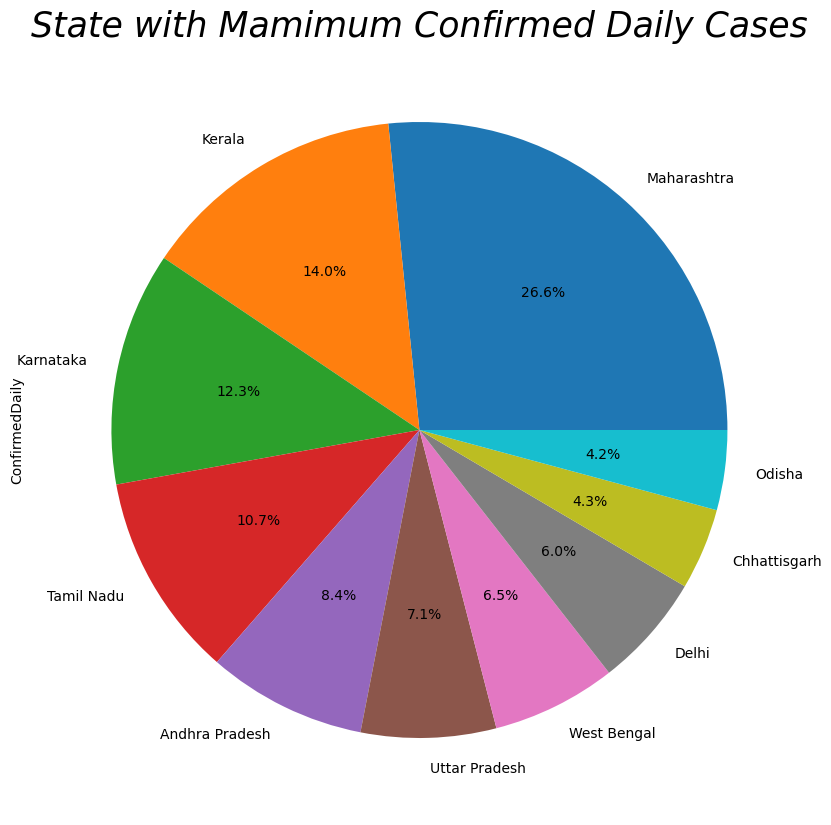

In [117]:
plt.figure(figsize=(20,15))

dfstateconfirmeddaily.sort_values(["ConfirmedDaily"],ascending=False)
dfstateconfirmeddaily["ConfirmedDaily"].plot(kind="pie",labels=dfstateconfirmeddaily['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Mamimum Confirmed Daily Cases",fontsize=25,fontstyle="oblique")

In [118]:
dfstatecureddaily=dfstatedaily.sort_values(["CuredDaily"],ascending=False,ignore_index=True)
dfstatecureddaily=dfstatecureddaily.iloc[0:10]

Text(0.5, 1.0, 'State with Mamimum Cured Daily Cases')

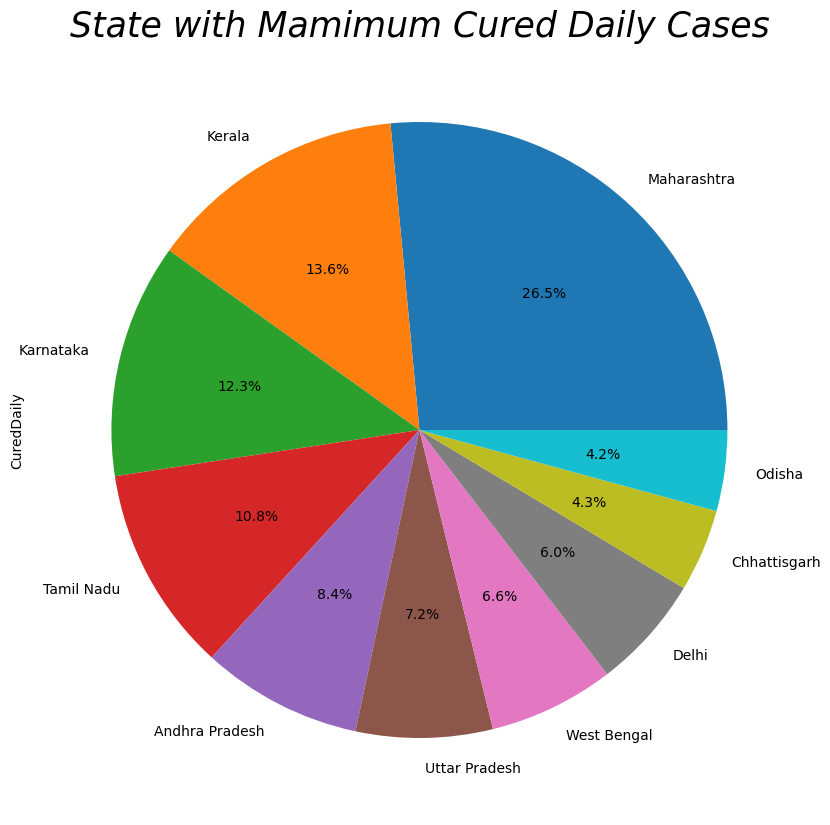

In [119]:
plt.figure(figsize=(20,15))

dfstatecureddaily.sort_values(["CuredDaily"],ascending=False)
dfstatecureddaily["CuredDaily"].plot(kind="pie",labels=dfstatecureddaily['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Mamimum Cured Daily Cases",fontsize=25,fontstyle="oblique")

In [120]:
dfstatedeathdaily=dfstatedaily.sort_values(["DeathsDaily"],ascending=False,ignore_index=True)
dfstatedeathdaily=dfstatedeathdaily.iloc[0:10]

Text(0.5, 1.0, 'State with Mamimum Deaths Daily Cases')

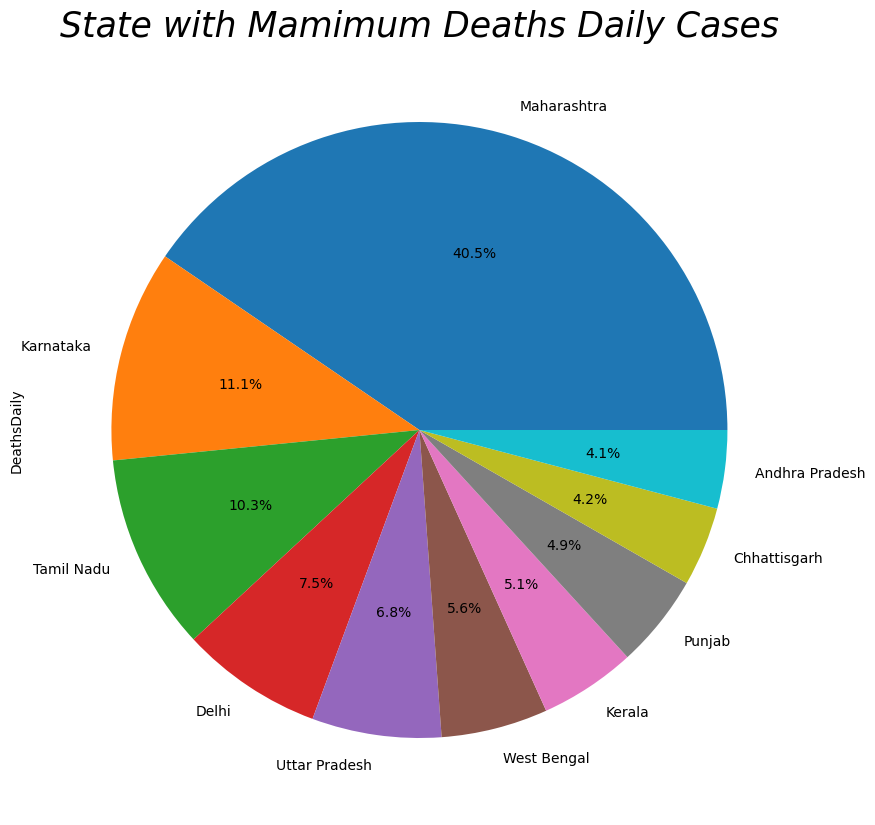

In [121]:
plt.figure(figsize=(20,15))

dfstatedeathdaily.sort_values(["DeathsDaily"],ascending=False)
dfstatedeathdaily["DeathsDaily"].plot(kind="pie",labels=dfstatedeathdaily['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Mamimum Deaths Daily Cases",fontsize=25,fontstyle="oblique")

In [122]:
dfmonthwise1=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfmonthwise1=dfmonthwise1.groupby(['YYMM'])[['CuredDaily', 'DeathsDaily', 'ConfirmedDaily']].mean().reset_index()

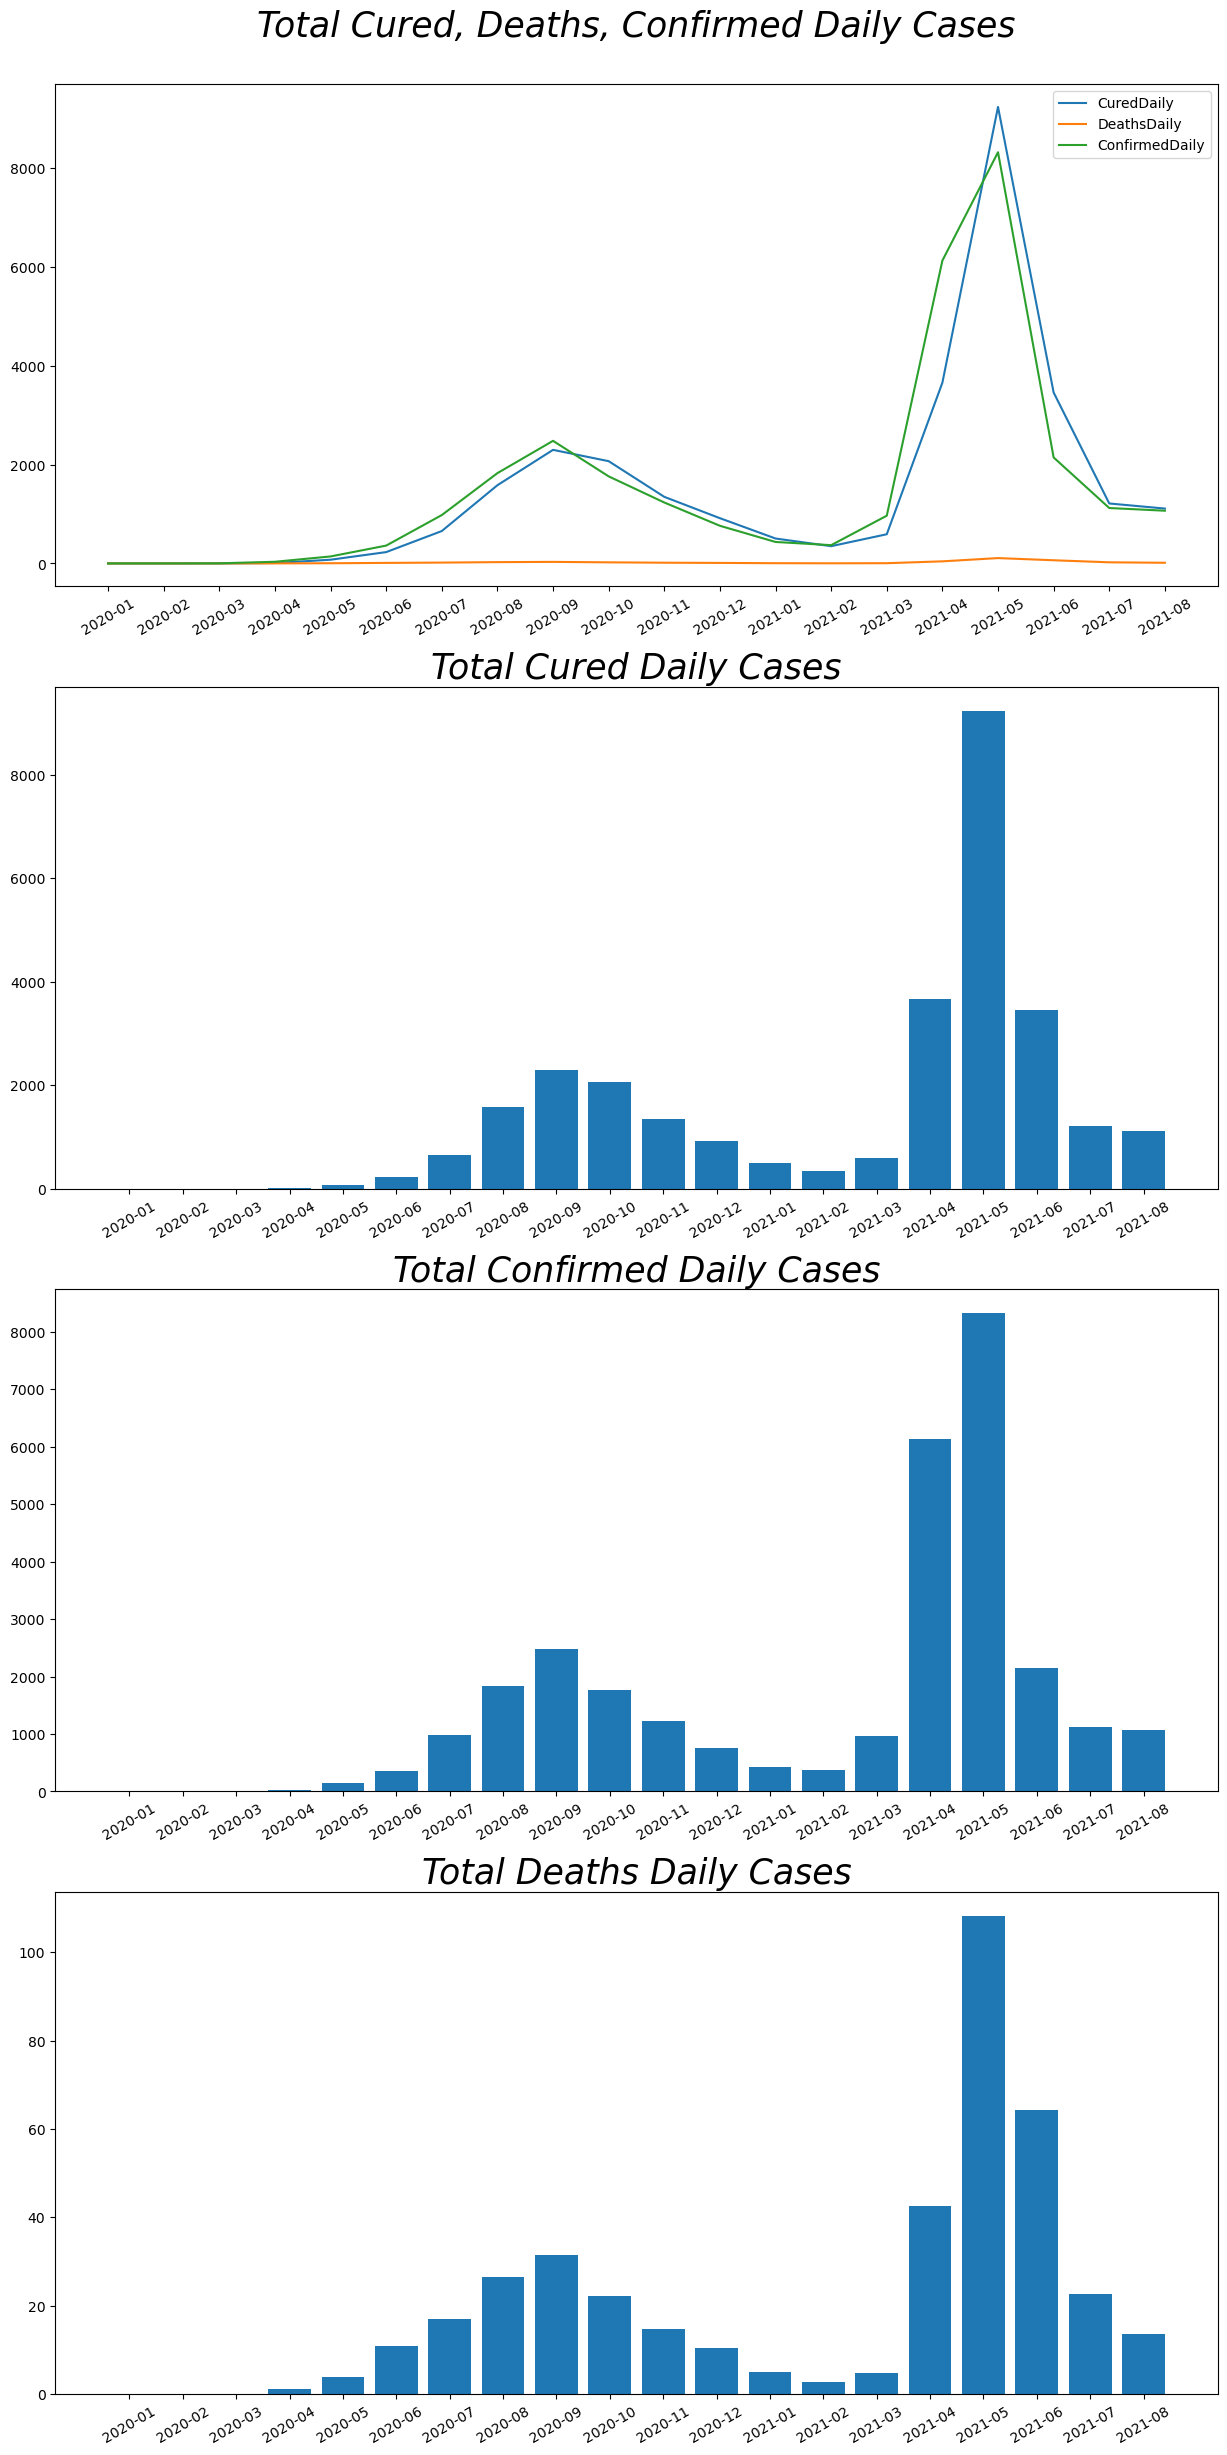

In [123]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfmonthwise1["YYMM"],dfmonthwise1[['CuredDaily','DeathsDaily','ConfirmedDaily']])
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.legend(['CuredDaily','DeathsDaily','ConfirmedDaily'])
plt.title("Total Cured, Deaths, Confirmed Daily Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfmonthwise1['YYMM'], dfmonthwise1["CuredDaily"],align='center')
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.title("Total Cured Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfmonthwise1['YYMM'], dfmonthwise1["ConfirmedDaily"],align='center')
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.title("Total Confirmed Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfmonthwise1['YYMM'], dfmonthwise1["DeathsDaily"],align='center')
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.title("Total Deaths Daily Cases",fontsize=25,fontstyle="oblique")
plt.show()

In [124]:
dfqtrwise1=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfqtrwise1=dfqtrwise1.groupby(['YYQQ'])[['CuredDaily', 'DeathsDaily', 'ConfirmedDaily']].mean().reset_index()

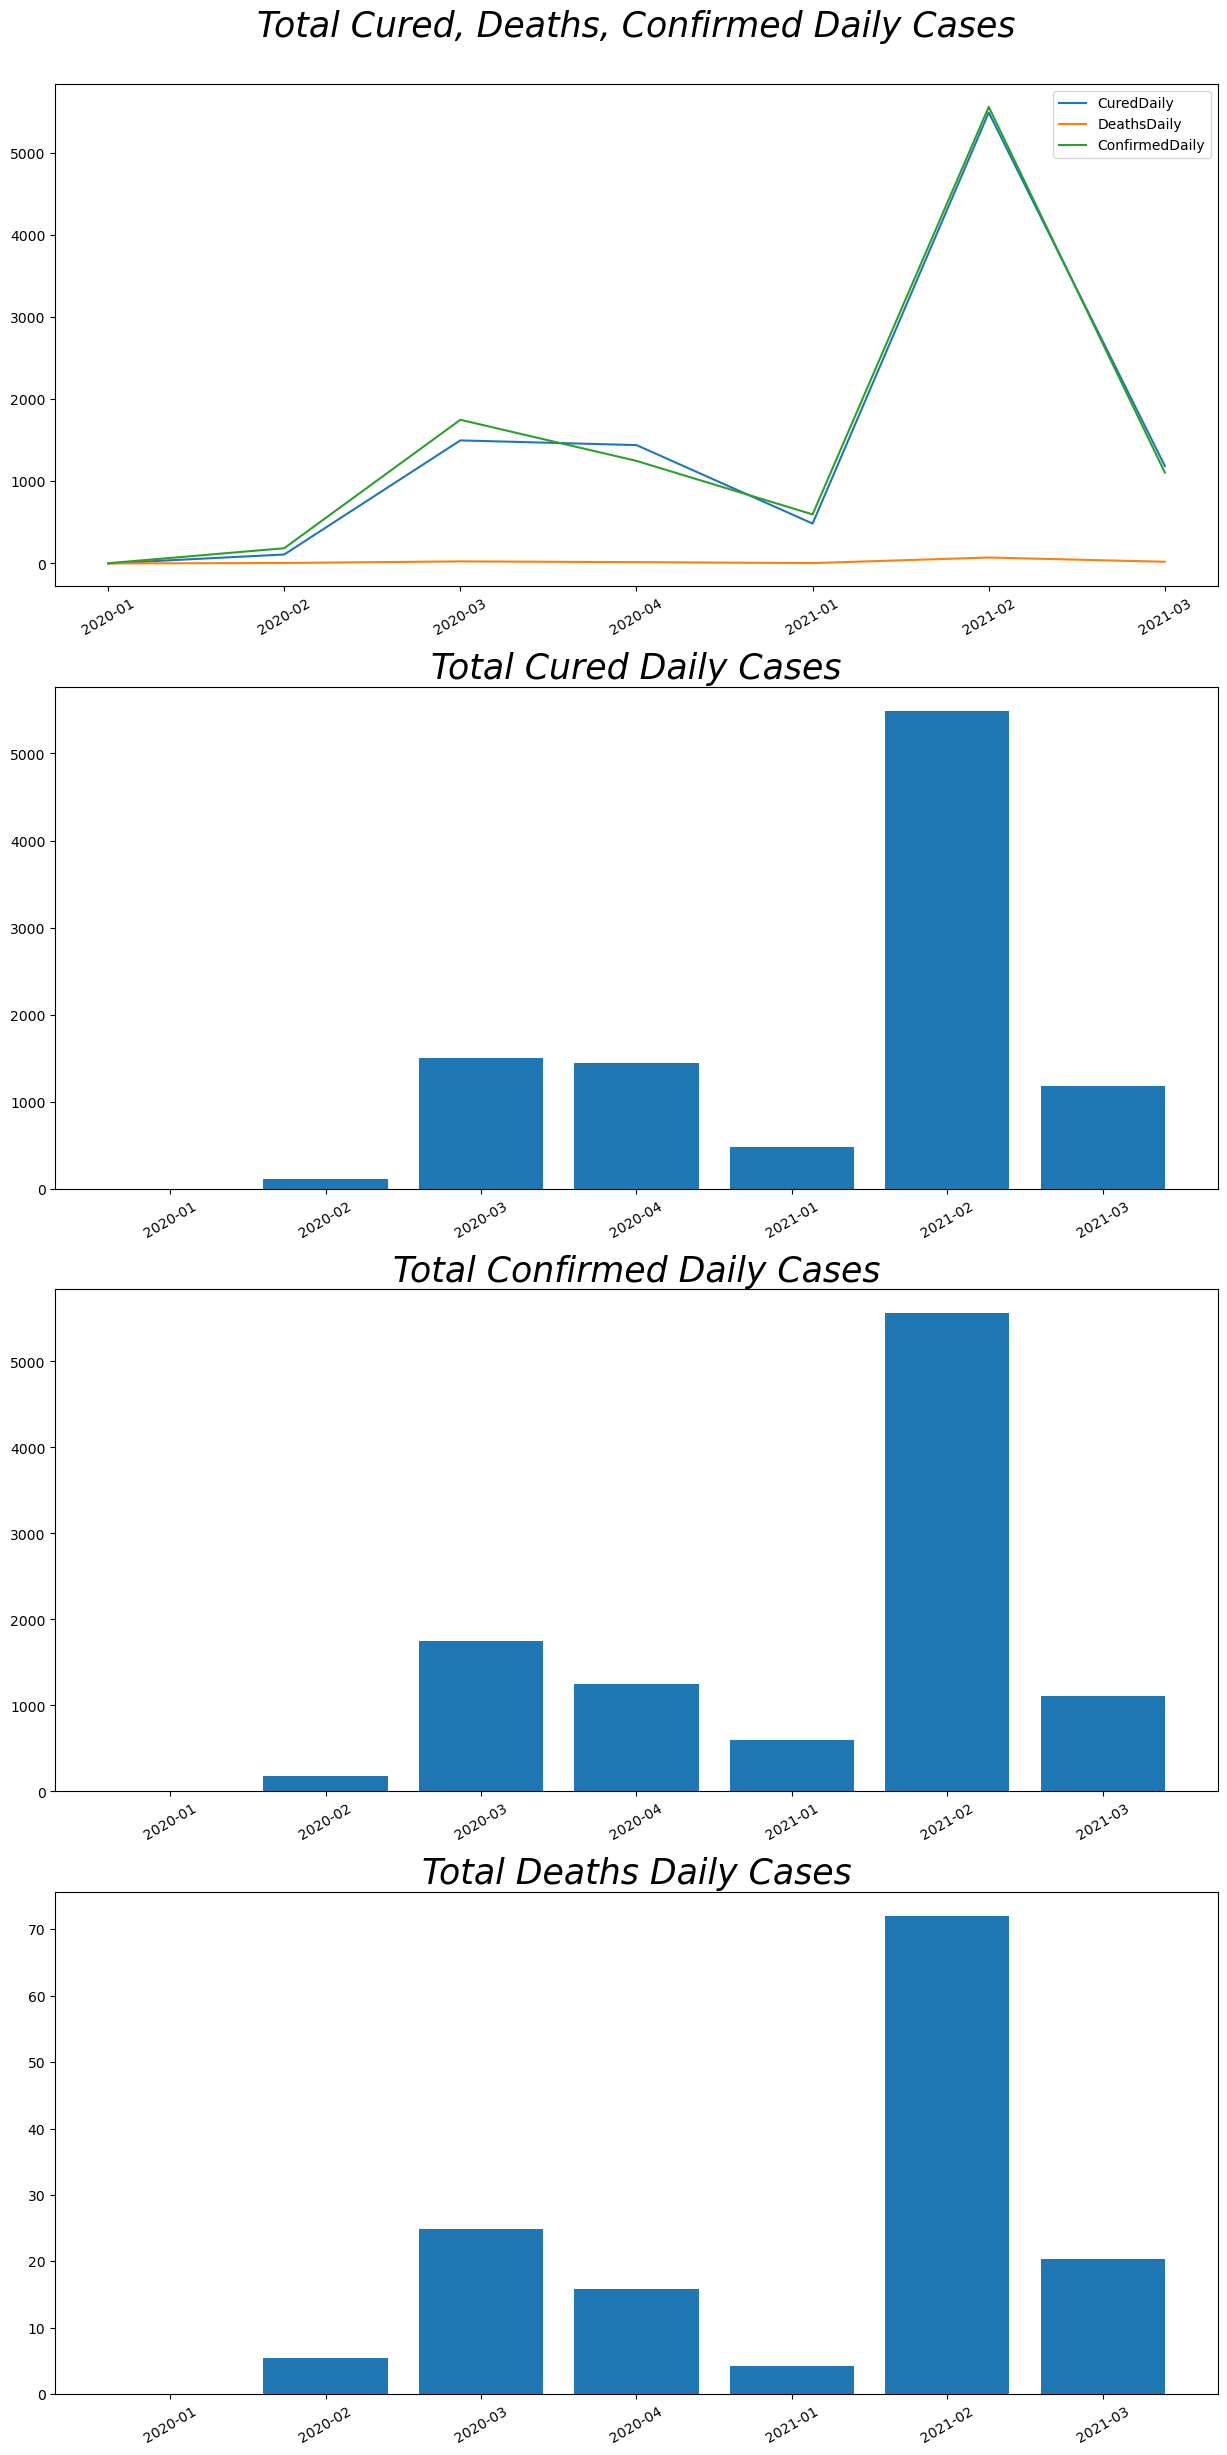

In [125]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfqtrwise1["YYQQ"],dfqtrwise1[['CuredDaily','DeathsDaily','ConfirmedDaily']])
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.legend(['CuredDaily','DeathsDaily','ConfirmedDaily'])
plt.title("Total Cured, Deaths, Confirmed Daily Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfqtrwise1["YYQQ"], dfqtrwise1["CuredDaily"],align='center')
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.title("Total Cured Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfqtrwise1["YYQQ"], dfqtrwise1["ConfirmedDaily"],align='center')
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.title("Total Confirmed Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfqtrwise1["YYQQ"], dfqtrwise1["DeathsDaily"],align='center')
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.title("Total Deaths Daily Cases",fontsize=25,fontstyle="oblique")
plt.show()

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18111 entries, 0 to 18110
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18111 non-null  datetime64[ns]
 1   State/UnionTerritory  18111 non-null  object        
 2   Cured                 18111 non-null  int64         
 3   Deaths                18111 non-null  int64         
 4   Confirmed             18111 non-null  int64         
 5   ActiveCases           18111 non-null  int64         
 6   CuredDaily            18111 non-null  int64         
 7   DeathsDaily           18111 non-null  int64         
 8   ConfirmedDaily        18111 non-null  int64         
 9   ActiveDaily           18111 non-null  int64         
 10  Day                   18111 non-null  object        
 11  Month                 18111 non-null  object        
 12  Year                  18111 non-null  object        
 13  Qtr             